# Prediction using Supervised ML

### Objective: Predict the percentage of a student based on the number of study hours using simple linear regression.

__Author: Deepika Dhania__

__Importing required libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

__Loading the dataset__

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

__Displaying the first 5 rows of dataset__

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


__Printing summary of the dataset__

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Our data contains total 25 entries with 2 columns as Hours and Scores with no null values. Data type of Hours is float and of Scores is int.

__Finding the pairwise correlation among columns of dataset__

In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation table above depicts a strong relationship between the two variables- Hours and Scores.

__Representing the datapoints on a 2D graph to manually find the relationship between the two variables__

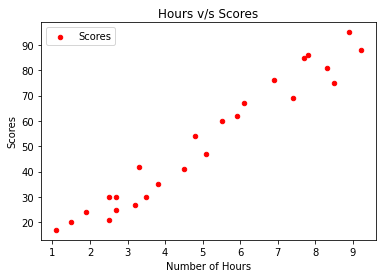

In [7]:
df.plot(kind="scatter", x="Hours", y="Scores", color="red", label="Scores")
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours v/s Scores")
plt.show()

A positive linear relationship between variables can be seen in the above graph.

### Data Preparation

#### Dividing the data into attributes/independent variable and labels/dependent variable. Here, x is the independent variable that is "Hours" and y is the dependent variable that is "Scores".

In [8]:
x=df.iloc[:, :-1].values
y=df.iloc[:,1].values

__Splitting the dataset into training and test set. The training set is used for training the model and then check the performance of the model on the test dataset.__

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

#### Fit the simple linear regression model to training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

__Predict the test set results__

In [11]:
y_pred= regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

y_pred are the predicted Scores through our model

In [12]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

y_test are the actual scores of the dataset. You can observe the closeness in the value of the Scores of predicted and actual. Let's establish this through a table and a graph.

__Comparing actual v/s predicted values__

In [14]:
df1= pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


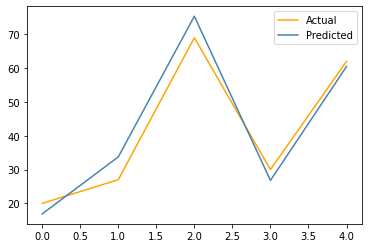

In [20]:
plt.plot(df1['Actual'], color='orange')
plt.plot(df1['Predicted'], color='steelblue')
plt.legend(["Actual", "Predicted"])
plt.show()

In the above graph, orange line represents actual values and blue line represents predicted values.

### Data Visualization

__Plot the regression line, i.e., Visualizing the training set__

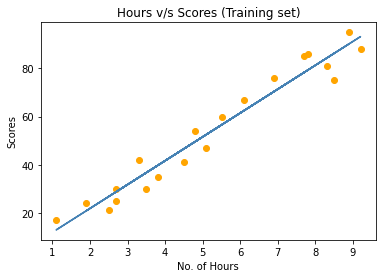

In [29]:
#plot actual data points of training dataset
plt.scatter(X_train, y_train, color = "orange") 
#plot the regression line
plt.plot(X_train, regressor.predict(X_train), color="steelblue")
#label the graph
plt.title("Hours v/s Scores (Training set)")
plt.xlabel("No. of Hours")
plt.ylabel("Scores")
plt.show()

__Visualizing the test dataset__

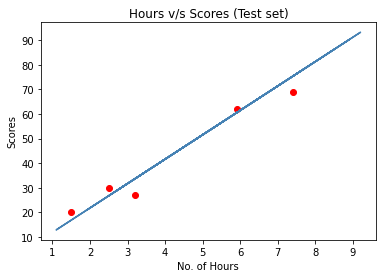

In [30]:
#plot actual data points of test dataset
plt.scatter(X_test, y_test, color = "r")
#plot the regression line
plt.plot(X_train, regressor.predict(X_train), color="steelblue")
#label the graph
plt.title("Hours v/s Scores (Test set)")
plt.xlabel("No. of Hours")
plt.ylabel("Scores")
plt.show()

### Predicting score if a student studies for 9.25 hrs/ day

In [31]:
#new_pred is the predicted score for 9.25
new_pred= regressor.predict([[9.25]])
#print the predicted score
print("Predicted score if a student studies for 9.25 hrs/ day is {}".format(new_pred))

Predicted score if a student studies for 9.25 hrs/ day is [93.69173249]


__Model Evaluation__

Mean absolute error(MAE), Mean square error(MSE) and Root mean square error(RMSE) are the most popular evaluation metrics in regression problems.
Lower the values of these evaluation metrics, better is the performance of the model.

In [32]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error:  4.6474476121003665
